In [1]:
from tcsim.system import*
from tcsim.visualization import*
from tcsim.gates import*
from scipy import optimize

### Parameters for one step

In [2]:
X = (a.dag()+a)/2
P = (1j*(a.dag()-a))/2

def varianceP(uvs):
    u_1 = uvs[0]
    v_1 = uvs[1]

    psi1 = V_ideal_operator(v_1)*U_ideal_operator(u_1)*vac
    print(qt.expect(P**2,psi1))
    return qt.expect(P**2,psi1)

In [3]:
initial_guess = [1, 0]
result = optimize.minimize(varianceP, initial_guess)
if result.success:
    fitted_params = result.x
    print(fitted_params)
else:
    raise ValueError(result.message)

0.25
0.2499999999999999
0.25000000451900567
0.1810226037121579
0.18102260371215817
0.1810226059716607
0.15803013970713983
0.15803013970713967
0.15803013970713972
[ 0.99999997 -0.60653067]


record of good values:
[ 1.00000001 -0.60653066]-> 0.158

The resulting state is squeezed by -3.010299827209979 dB in X
The resulting state is squeezed by 1.992000846277803 dB in P


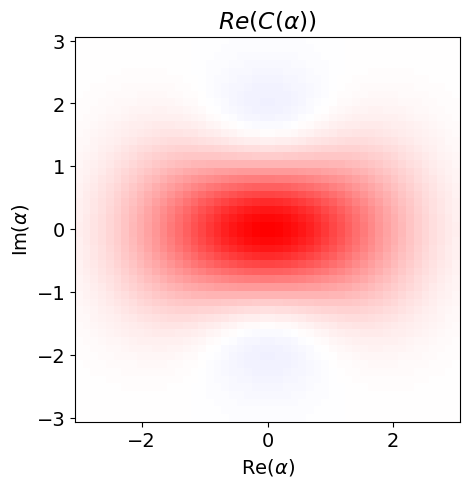

In [5]:
def squeezingStateOneStep(uvs):
    u_1 = uvs[0]
    v_1 = uvs[1]

    psi1 = V_ideal_operator(v_1)*U_ideal_operator(u_1)*vac
 
    return psi1

state = squeezingStateOneStep(fitted_params)
plot_char(state)
dbp = -10*np.log10(qt.expect(P**2,state)*4)
dbx = -10*np.log10(qt.expect(X**2,state)*4)
print(f"The resulting state is squeezed by {dbx} dB in X")
print(f"The resulting state is squeezed by {dbp} dB in P")

### Parameters for two steps

In [10]:
def varianceP(uvs):
    u_1 = uvs[0]
    v_1 = uvs[1]
    u_2 = uvs[2]
    v_2 = uvs[3]

    psi1 = V_ideal_operator(v_1)*U_ideal_operator(u_1)*vac
    psi2 = V_ideal_operator(v_2)*U_ideal_operator(u_2)*psi1
    print(qt.expect(P**2,psi2))
    return qt.expect(P**2,psi2)

initial_guess = [1,1, -.5,-1 ]
result = optimize.minimize(varianceP, initial_guess)
if result.success:
    fitted_params = result.x
    print(fitted_params)
else:
    raise ValueError(result.message)

0.5293509576553854
0.529350953410135
0.529350970107743
0.529350939677079
0.5293509580117376
0.32360440554411024
0.3236044085165476
0.32360440892709913
0.32360441523522215
0.3236044032450009
0.16853184782214248
0.16853184849702973
0.16853184658902934
0.1685318494784955
0.16853184647821545
0.15438502599116843
0.1543850258766889
0.1543850256328305
0.154385026987106
0.1543850259666914
0.1503649223058652
0.15036492172588461
0.15036492214503172
0.15036492282873162
0.15036492277606597
0.1438782040275324
0.1438782027041846
0.14387820424900857
0.14387820370721968
0.14387820511436883
0.13819777220259813
0.13819776975853074
0.13819777385041554
0.13819776997433414
0.1381977737598808
0.12725391935194694
0.12725391712872372
0.12725392061375976
0.12725391750513573
0.1272539207299478
0.09692767134105906
0.09692767029009673
0.09692767072782849
0.09692767109173912
0.0969276718245624
0.16655652372979948
0.16655652511166774
0.16655653094549774
0.16655652031552887
0.16655652127286324
0.08387544889685886
0.

record of good values:
[ 1.93872301  0.4409296  -0.57281612 -1.06157337] -> 0.08

In [11]:
def squeezingStateTwoStep(uvs):
    u_1 = uvs[0]
    v_1 = uvs[1]
    u_2 = uvs[2]
    v_2 = uvs[3]
    
    
    psi1 = U_ideal_operator(u_1)*vac
    psi2 = V_ideal_operator(v_1)*psi1
    psi3 = U_ideal_operator(u_2)*psi2
    psi4 = V_ideal_operator(v_2)*psi3
 
    return [psi1, psi2, psi3, psi4]

state = squeezingStateTwoStep(fitted_params)


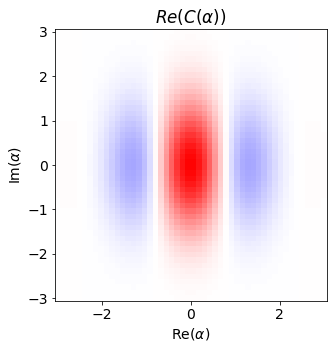

In [13]:
plot_char(state[0])

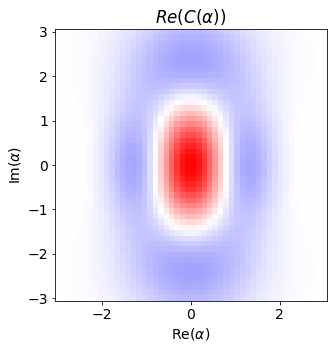

In [14]:
plot_char(state[1])

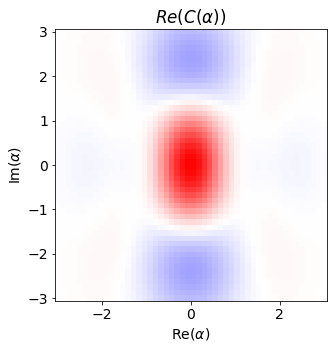

In [15]:
plot_char(state[2])

The resulting state is squeezed by 4.8341731438727225 dB
-6.063689456482163


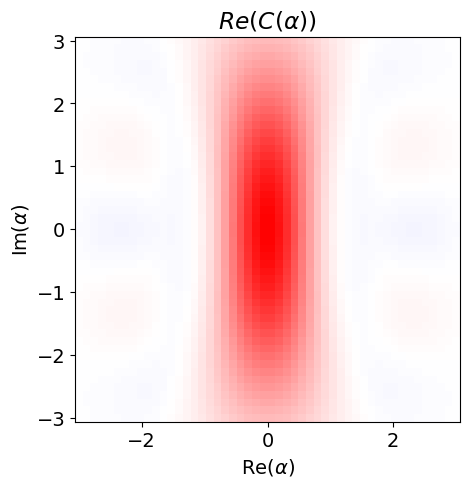

In [13]:
plot_char(state[3])
dp = -10*np.log10(qt.expect(P**2,state[3])*4)
dbx = -10*np.log10(qt.expect(X**2,state[3])*4)
print(f"The resulting state is squeezed by {dp} dB")
print(dbx)

## Parameters for three steps

In [9]:
def varianceP(uvs):
    u_1 = uvs[0]
    v_1 = uvs[1]
    u_2 = uvs[2]
    v_2 = uvs[3]
    u_3 = uvs[4]
    v_3 = uvs[5]

    psi1 = V_ideal_operator(v_1)*U_ideal_operator(u_1)*vac
    psi2 = V_ideal_operator(v_2)*U_ideal_operator(u_2)*psi1
    psi3 = V_ideal_operator(v_3)*U_ideal_operator(u_3)*psi2
    print(qt.expect(P**2,psi3))
    return qt.expect(P**2,psi3)


import random#
#initial_guess = [ 1,1,1,-1,-1,-1]
initial_guess = [random.randrange(-10, 10, 1)/10 for i in range(6)]

result = optimize.minimize(varianceP, initial_guess, method= 'SLSQP' )
if result.success:
    fitted_params = result.x
    print(fitted_params)
else:
    raise ValueError(result.message)

0.3752350936050962
0.3752350948963633
0.3752350913302825
0.37523509465436905
0.37523508713992954
0.37523509490471724
0.3752350869981153
0.15866076255110756
0.15866076176172464
0.1586607588367359
0.15866076219965075
0.15866076273223473
0.1586607628241718
0.15866076273802546
0.11774053090218713
0.1177405302149402
0.11774053053954059
0.11774053123185668
0.11774053152266364
0.1177405314821739
0.11774053148374021
0.11209310863536666
0.1120931081904362
0.11209310861590328
0.11209310894242606
0.11209310873147989
0.11209310908754633
0.11209310862377148
0.10799961470969398
0.10799961462887604
0.10799961499760648
0.10799961498803133
0.10799961448832625
0.10799961510536216
0.10799961429644811
0.10436323390199284
0.1043632341906394
0.10436323426967915
0.10436323409726944
0.10436323352686208
0.10436323428856677
0.10436323332095607
0.09967453384661885
0.09967453468929285
0.09967453408025173
0.09967453375252122
0.09967453323692528
0.09967453419199561
0.09967453341333338
0.09516193186936292
0.09516193

record of good values: 
\
[ 1.84531183,  0.42317944, -0.54502311, -1.10388431,  1.98896233, -0.33341153] -> 0.05594382101928646 \
[ 0.7638112  -0.61285946  2.52561177  0.33656678 -0.71748393 -0.84671525] -> 0.057597773122561396 \
[-0.84571552  0.61335235  2.63648988  0.30560449 -0.91694799 -0.80353261] - > 0.04867267133276083

In [7]:
fitted_params

array([-0.79316034,  0.67469589, -1.21632614,  0.46923726, -1.52851995,
        0.379403  ])

The resulting state is squeezed by 5.066740528380526 dB
-7.2678751193583055


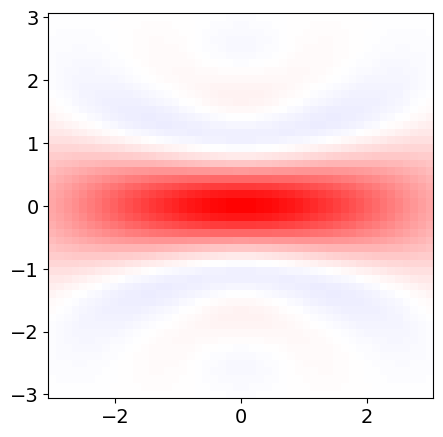

In [8]:
uvs =fitted_params #[-0.84571552,  0.61335235,  2.63648988,  0.30560449, -0.91694799, -0.80353261]
def squeezingStateTwoStep(uvs):
    u_1 = uvs[0]
    v_1 = uvs[1]
    u_2 = uvs[2]
    v_2 = uvs[3]
    u_3 = uvs[4]
    v_3 = uvs[5]

    psi1 = V_ideal_operator(v_1)*U_ideal_operator(u_1)*vac
    psi2 = V_ideal_operator(v_2)*U_ideal_operator(u_2)*psi1
    psi3 = V_ideal_operator(v_3)*U_ideal_operator(u_3)*psi2
 
    return psi3

state = squeezingStateTwoStep(uvs)
plot_char(state)
db = -10*np.log10(qt.expect(P**2,state)*4)
dbx = -10*np.log10(qt.expect(X**2,state)*4)
print(f"The resulting state is squeezed by {db} dB")#
print(dbx)

In [131]:
print(initial_guess)

[-0.4, 0.9, 0.8, 0.6, -0.3, -0.9]


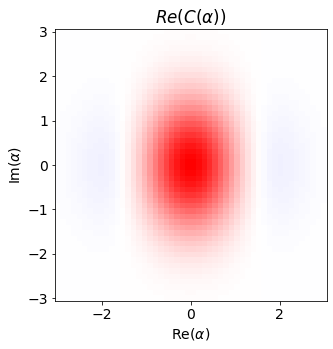

In [8]:

u_1 = 1
v_1 = 0

psi = V_ideal_operator(v_1)*U_ideal_operator(u_1)*vac

plot_char(psi)


In [ ]:
def varianceP(uvs):
    u_1 = uvs[0]
    v_1 = uvs[1]
    u_2 = uvs[2]
    v_2 = uvs[3]
    u_3 = uvs[4]
    v_3 = uvs[5]
     u_3 = uvs[4]
    v_3 = uvs[5]


    psi1 = V_ideal_operator(v_1)*U_ideal_operator(u_1)*vac
    psi2 = V_ideal_operator(v_2)*U_ideal_operator(u_2)*psi1
    psi3 = V_ideal_operator(v_3)*U_ideal_operator(u_3)*psi2
    print(qt.expect(P**2,psi3))
    return qt.expect(P**2,psi3)


import random#
#initial_guess = [ 1,1,1,-1,-1,-1]
initial_guess = [random.randrange(-10, 10, 1)/10 for i in range(6)]

result = optimize.minimize(varianceP, initial_guess, method= 'SLSQP' )
if result.success:
    fitted_params = result.x
    print(fitted_params)
else:
    raise ValueError(result.message)